<a href="https://colab.research.google.com/github/zachfurie/zachfurie/blob/main/Music_Generator_1(separate%20notes%20and%20durs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Music File  1 / 292 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset_Single_Folder/alb_esp4.mid
Loading Music File  2 / 292 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset_Single_Folder/alb_esp1.mid
Loading Music File  3 / 292 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset_Single_Folder/alb_esp2.mid
Loading Music File  4 / 292 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset_Single_Folder/alb_esp3.mid
Loading Music File  5 / 292 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset_Single_Folder/alb_se1.mid
Loading Music File  6 / 292 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset_Single_Folder/alb_se3.mid
Loading Music File  7 / 292 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset_Single_Folder/alb_esp6.mid
Loading Music File  8 / 292 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset_Single_Folder/alb_esp5.mid
Loading Music File  9 / 292 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset_Single_Folder/alb_se2.mid
Loading Music File  10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


first 5 notes:  ['G5', 'D5', 'B4', 'E-5', 'C5']
first 5 durs:  [0.25, 0.25, 0.25, 0.25, 0.25]
Unique Notes:  477
Unique Durs:  69


(array([375.,  47.,  15.,   7.,   6.,   3.,   8.,   8.,   3.,   5.]),
 array([1.00000e+00, 1.18810e+03, 2.37520e+03, 3.56230e+03, 4.74940e+03,
        5.93650e+03, 7.12360e+03, 8.31070e+03, 9.49780e+03, 1.06849e+04,
        1.18720e+04]),
 <a list of 10 Patch objects>)

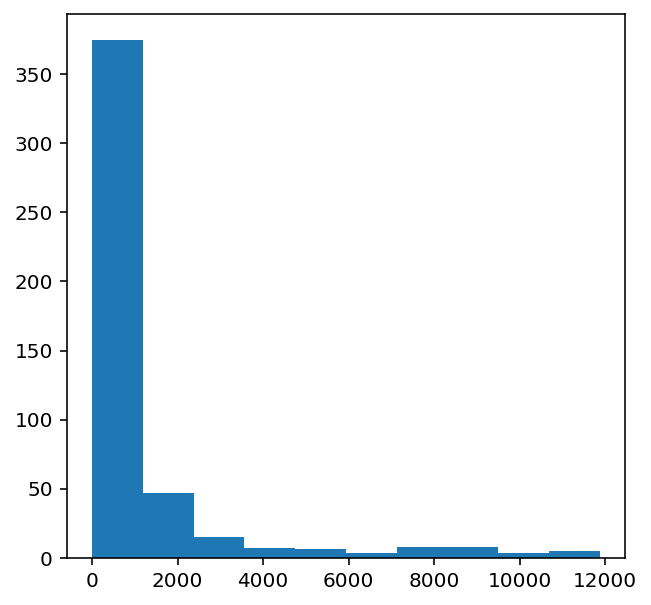

In [ ]:
from music21 import *
import numpy as np
import os


def read_midi(file,index,length):
    print("Loading Music File ",index+1,'/',length,":", file)
    notes = []
    durs = []
    notes_to_parse = None
    offset = 0
    # parsing a midi file
    midi = converter.parse(file)
    # grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)
    # Looping over all the instruments
    for part in s2.parts:
        # select elements of only piano
        if 'Piano' in str(part):
          notes_to_parse = part.recurse()
          # finding whether a particular element is note or a chord
          for element in notes_to_parse:
              if element.duration.type == 'zero':
                durat = 0.166666666
              else:
                durat = element.duration.quarterLength
              # note
              if isinstance(element, note.Note):
                  notes.append(str(element.pitch))
                  durs.append(float(durat))
                  #+'_'+str(element.offset-offset)
                  #offset = element.offset
              # chord
              elif isinstance(element, chord.Chord):
                  notes.append('.'.join(str(n) for n in element.normalOrder))
                  durs.append(float(durat))
                  #+'_'+str(element.offset-offset)
                  #offset = element.offset
    return np.array(notes), np.array(durs)


#specify the path

#Local Files:
#path='/Users/zachfurie/Downloads/LoFi_HipHop_MIDI_Dataset/'
#path='/Users/zachfurie/Downloads/Classical_Music_MIDI_Dataset/mozart/'
#path='/Users/zachfurie/Downloads/Classical_Music_MIDI_Dataset/liszt/'
#path='/Users/zachfurie/Desktop/Classical_Music_MIDI_Dataset_Single_Folder/'

#Drive Files:
path='/content/drive/MyDrive/Classical_Music_MIDI_Dataset_Single_Folder/'
#path='/content/drive/MyDrive/Classical_Music_MIDI_Dataset/liszt/'
#path='/content/drive/MyDrive/Classical_Music_MIDI_Dataset/mozart/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = [] 
durs_array = []
for i in files:
 temp_n, temp_d = read_midi(path+i,files.index(i),len(files))
 notes_array.append(temp_n)
 durs_array.append(temp_d)

notes_array = np.array(notes_array) 
durs_array = np.array(durs_array) 


#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]
print('first 5 notes: ',notes_[0:5])
durs_ = [element for dur_ in durs_array for element in dur_]
print('first 5 durs: ',durs_[0:5])

#No. of unique notes
unique_notes = list(set(notes_))
print('Unique Notes: ',len(unique_notes))
unique_durs = list(set(durs_))
print('Unique Durs: ',len(unique_durs))

#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))
freq_d = dict(Counter(durs_))


#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)


In [ ]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50] #50
print(len(frequent_notes))

frequent_durs = [note_ for note_, count in freq_d.items() if count>=50] #50
print(len(frequent_durs))

233
25


(array([64.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([1.000000e+00, 2.105160e+04, 4.210220e+04, 6.315280e+04,
        8.420340e+04, 1.052540e+05, 1.263046e+05, 1.473552e+05,
        1.684058e+05, 1.894564e+05, 2.105070e+05]),
 <a list of 10 Patch objects>)

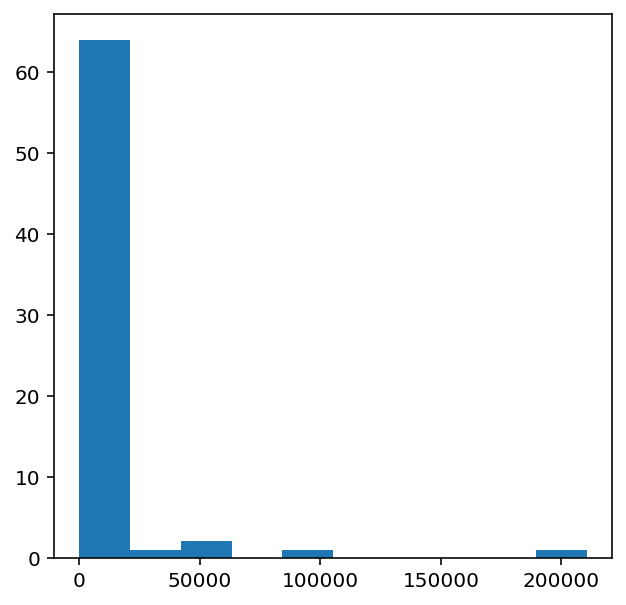

In [ ]:
#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq_d.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [ ]:
print(durs_)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def remove_infrequent_items(notes_array, frequent_notes):
  new_music=[]

  for notes in notes_array:
      temp=[]
      for note_ in notes:
          if note_ in frequent_notes:
              temp.append(note_)            
      new_music.append(temp)
      
  new_music = np.array(new_music, dtype=object)
  return new_music

new_durs = remove_infrequent_items(durs_array, frequent_durs) 
new_music = remove_infrequent_items(notes_array, frequent_notes) 


In [ ]:
def timesteps(new_music):
  no_of_timesteps = 32
  x = []
  y = []

  for note_ in new_music:
      for i in range(0, len(note_) - no_of_timesteps, 1):
          
          #preparing input and output sequences
          input_ = note_[i:i + no_of_timesteps]
          output = note_[i + no_of_timesteps]
          
          x.append(input_)
          y.append(output)
          
  x=np.array(x)
  y=np.array(y)
  return x, y

x_n, y_n = timesteps(new_music)
x_d, y_d = timesteps(new_durs)



In [ ]:
print(np.shape(x_n))
print(np.shape(x_d))

(461168, 32)
(463232, 32)


In [ ]:
def unique_and_nti(x):
  unique_x = list(set(x.ravel()))
  x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))
  return unique_x, x_note_to_int

unique_x_n, x_note_to_int_n = unique_and_nti(x_n)
unique_x_d, x_note_to_int_d = unique_and_nti(x_d)

In [ ]:
#preparing input sequences
def prepseq(x, x_note_to_int):
  x_seq=[]
  for i in x:
      temp=[]
      for j in i:
          #assigning unique integer to every note
          temp.append(x_note_to_int[j])
      x_seq.append(temp)
      
  x_seq = np.array(x_seq)
  return x_seq

x_seq_n = prepseq(x_n, x_note_to_int_n)
x_seq_d = np.asarray(x_d)

In [ ]:
def unique_y_func(y):
  unique_y = list(set(y))
  y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
  y_seq=np.array([y_note_to_int[i] for i in y])
  return unique_y, y_note_to_int, y_seq

unique_y_n, y_note_to_int_n, y_seq_n = unique_y_func(y_n)
unique_y_d, y_note_to_int_d, y_seq_d = unique_y_func(y_d)
y_seq_d = np.asarray(y_d)



In [ ]:
print(np.shape(x_seq_d))
print(np.shape(y_seq_d))

(463232, 32)
(463232,)


In [ ]:
from sklearn.model_selection import train_test_split
#x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

x_tr_n, x_val_n, y_tr_n, y_val_n = train_test_split(x_seq_n,y_seq_n,test_size=0.2,random_state=0)
x_tr_d, x_val_d, y_tr_d, y_val_d = train_test_split(x_seq_d,y_seq_d,test_size=0.2,random_state=0)

In [ ]:
print(np.shape(x_tr_n))
print(np.shape(x_tr_d))

print(np.shape(x_val_n))
print(np.shape(x_val_d))

print(np.shape(y_tr_n))
print(np.shape(y_tr_d))

print(np.shape(y_val_n))
print(np.shape(y_val_d))

(368934, 32)
(370585, 32)
(92234, 32)
(92647, 32)
(368934,)
(370585,)
(92234,)
(92647,)


In [ ]:
def lstm():
  model = Sequential()
  model.add(LSTM(128,return_sequences=True))
  model.add(LSTM(128))
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(n_vocab))
  model.add(Activation('softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
  return model

In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x_n), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y_n), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           23300     
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0

In [ ]:
mc_n = [EarlyStopping(monitor='val_loss', patience=5, mode='min', min_delta=0.0001),
      ModelCheckpoint('best_model_n.h5', monitor='val_loss', mode='min', save_best_only=True,
                   verbose=1)]

In [ ]:
history_n = model.fit(np.array(x_tr_n),np.array(y_tr_n),batch_size=128,epochs=50, validation_data=(np.array(x_val_n),np.array(y_val_n)),verbose=1, callbacks=[mc_n])


Epoch 1/50
2883/2883 [==============================] - 260s 90ms/step - loss: 3.9528 - val_loss: 3.8392

Epoch 00001: val_loss improved from inf to 3.83917, saving model to best_model_n.h5
Epoch 2/50
2883/2883 [==============================] - 258s 90ms/step - loss: 3.6748 - val_loss: 3.6882

Epoch 00002: val_loss improved from 3.83917 to 3.68821, saving model to best_model_n.h5
Epoch 3/50
2883/2883 [==============================] - 260s 90ms/step - loss: 3.5905 - val_loss: 3.6421

Epoch 00003: val_loss improved from 3.68821 to 3.64208, saving model to best_model_n.h5
Epoch 4/50
2883/2883 [==============================] - 260s 90ms/step - loss: 3.5382 - val_loss: 3.5751

Epoch 00004: val_loss improved from 3.64208 to 3.57510, saving model to best_model_n.h5
Epoch 5/50
2883/2883 [==============================] - 259s 90ms/step - loss: 3.5014 - val_loss: 3.5323

Epoch 00005: val_loss improved from 3.57510 to 3.53233, saving model to best_model_n.h5
Epoch 6/50
2883/2883 [============

In [ ]:
from google.colab import files
saveFile = open("x_val_n_save.txt", "w")
for val in x_val_n:
  saveFile.write(str(val)+',')
files.download('x_val_n_save.txt') 
saveFile = open("x_val_d_save.txt", "w")
for val in x_val_d:
  saveFile.write(str(val)+',')
files.download('x_val_d_save.txt')
files.download('best_model_n.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(history_n.history.keys())

dict_keys(['loss', 'val_loss'])


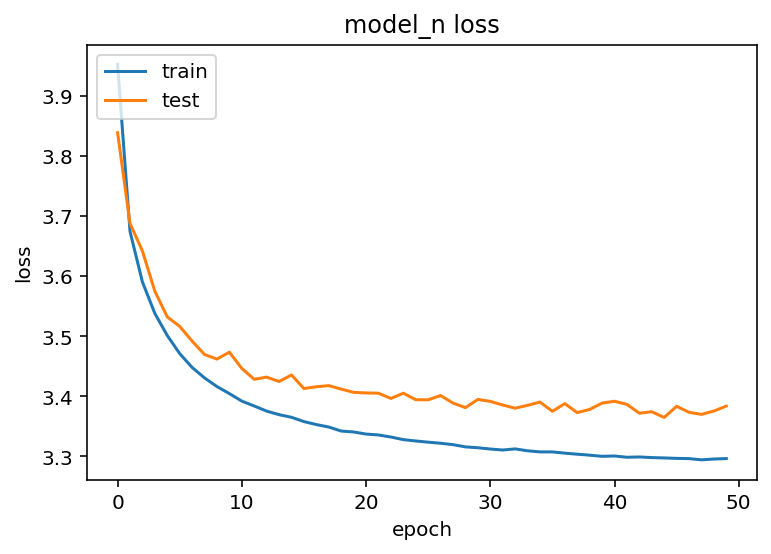

In [ ]:
# summarize history for loss
plt.plot(history_n.history['loss'])
plt.plot(history_n.history['val_loss'])
plt.title('model_n loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(len(unique_x_d))
print(np.shape(x_tr_d))

print(len(unique_x_n))
print(np.shape(x_tr_n))

25
(370585, 32)
233
(368934, 32)


In [ ]:
def failed_dimension_adder():
  #print(np.shape(x_tr_d))
  #print(np.shape(x_val_d))

  tt = np.array([[0]]*32, dtype=object)
  #print('tt ',np.shape(tt))
  tempt = np.array([tt]*len(x_tr_d), dtype=object)
  #print('tempt ', np.shape(tempt))
  tempv = [tt]*len(x_val_d)
  for x in range(len(x_tr_d)):
    tempboog = np.array([[0]]*32, dtype=object)
    #print(np.shape(tempboog))
    for y in range(32):
      temper = [0]
      temper[0] = x_tr_d[x][y]
      tempboog[y] = temper
    tempt[x] = tempboog
    
  for x in range(len(x_val_d)):
    tempboog = np.array([[0]]*32, dtype=object)
    #print(np.shape(tempboog))
    for y in range(32):
      temper = [0]
      temper[0] = x_val_d[x][y]
      tempboog[y] = temper
    tempv[x] = tempboog

  print('tempt post ', np.shape(tempt))
  print('tempv post ', np.shape(tempv))
  #x_tr_d = tempt
  #x_val_d = tempv

  print(np.shape(x_tr_d))
  print(np.shape(x_val_d))


In [ ]:
print(np.shape(x_tr_d))
print(np.shape(x_val_d))

x_tr_d = np.asarray(x_tr_d)
x_tr_d = np.expand_dims(x_tr_d, -1)

x_val_d = np.asarray(x_val_d)
x_val_d = np.expand_dims(x_val_d, -1)

print(np.shape(x_tr_d))
print(np.shape(x_val_d))

(370585, 32)
(92647, 32)
(370585, 32, 1)
(92647, 32, 1)


In [ ]:
print(y_val_d[0:10])

[0.25 0.5  0.25 0.75 0.25 0.5  0.5  0.25 0.25 0.25]


In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model_d = Sequential()
    
#embedding layer
#model_d.add(Input((None,32, 1))) #, 100, input_length=32,trainable=True)
#model_d.add(Embedding(len(unique_x_d), 100, input_length=32,trainable=True)) 

model_d.add(Conv1D(64,3, padding='causal',activation='relu', input_shape=(32,1))) #input_shape=(32,1,),,return_sequences=True)
model_d.add(Dropout(0.2))
model_d.add(MaxPool1D(2))
    
model_d.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model_d.add(Dropout(0.2))
model_d.add(MaxPool1D(2))

model_d.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model_d.add(Dropout(0.2))
model_d.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model_d.add(GlobalMaxPool1D())
    
model_d.add(Dense(256, activation='relu'))
model_d.add(Dense(len(unique_y_d), activation='softmax'))
    
model_d.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model_d.summary()

mc_d = [EarlyStopping(monitor='val_loss', patience=5, mode='min', min_delta=0.0001),
      ModelCheckpoint('best_model_d.h5', monitor='val_loss', mode='min', save_best_only=True,
                   verbose=1)]



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 32, 64)            256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 256)            9

In [ ]:
history_d = model_d.fit(np.array(x_tr_d),np.array(y_tr_d),batch_size=128,epochs=50, validation_data=(np.array(x_val_d),np.array(y_val_d)),verbose=1, callbacks=[mc_d])


Epoch 1/50
2896/2896 [==============================] - 211s 72ms/step - loss: 0.4767 - val_loss: 0.4951

Epoch 00001: val_loss improved from inf to 0.49509, saving model to best_model_d.h5
Epoch 2/50
2896/2896 [==============================] - 208s 72ms/step - loss: 0.4501 - val_loss: 0.4747

Epoch 00002: val_loss improved from 0.49509 to 0.47468, saving model to best_model_d.h5
Epoch 3/50
2896/2896 [==============================] - 207s 71ms/step - loss: 0.4431 - val_loss: 0.4452

Epoch 00003: val_loss improved from 0.47468 to 0.44524, saving model to best_model_d.h5
Epoch 4/50
2896/2896 [==============================] - 208s 72ms/step - loss: 0.4373 - val_loss: 0.4605

Epoch 00004: val_loss did not improve from 0.44524
Epoch 5/50
2896/2896 [==============================] - 208s 72ms/step - loss: 0.4323 - val_loss: 0.4249

Epoch 00005: val_loss improved from 0.44524 to 0.42495, saving model to best_model_d.h5
Epoch 6/50
2896/2896 [==============================] - 207s 71ms/step 

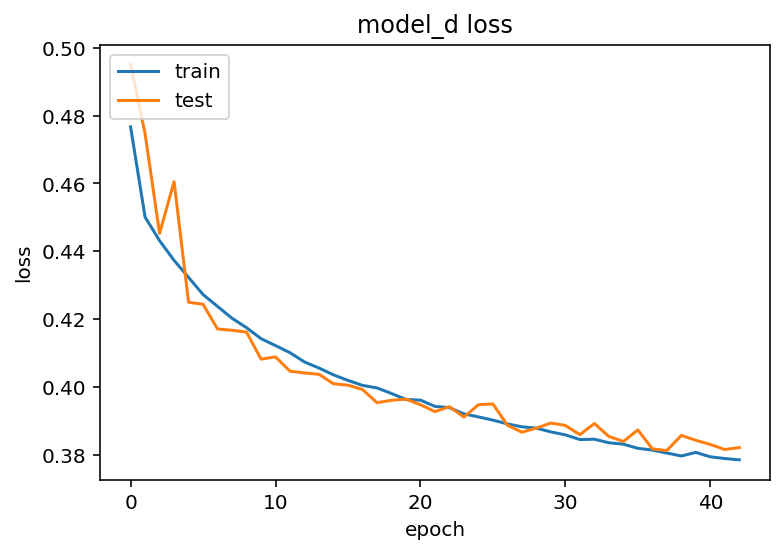

In [ ]:
# summarize history for loss
plt.plot(history_d.history['loss'])
plt.plot(history_d.history['val_loss'])
plt.title('model_d loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

#from google.colab import files
saveFile = open("unique_x_n_save.txt", "w")
for val in unique_x_n:
  saveFile.write(str(val)+',')
files.download('unique_x_n_save.txt') 

saveFile = open("unique_y_d_save.txt", "w")
for val in unique_y_d:
  saveFile.write(str(val)+',')
files.download('unique_y_d_save.txt')

files.download('best_model_d.h5')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#loading best model
from keras.models import load_model
model_n = load_model('best_model_n.h5')
model_d = load_model('best_model_d.h5')
import pandas as pd
#x_val_n = pd.read_csv('x_val_n_save.txt')


In [ ]:
#x_val_d = pd.read_csv('x_val_d_save.txt', sep=',', header=None)

file1 = open('x_val_d_save.txt', 'r')
x_val_d = file1.read()
file1.close()




In [ ]:
file2 = open('x_val_n_save.txt', 'r')
x_val_n = file2.read()
#file2.close()

In [ ]:
def save_to_list(x_val_d, typee):
  timestep_segs = x_val_d.split(',')
  #print(timestep_segs[0])
  #print(timestep_segs[0][0])
  lister = []
  np.asarray(lister, dtype=object)
  for seg in timestep_segs:
    segg = seg
    np.asarray(segg, dtype = object)
    temp = segg.strip('[')
    temp1 = temp.strip(']')
    temp2 = temp.split(' ')

    indlist = []
    for item in range(len(temp2)):
      if temp2[item] == '':
        indlist.append(item)
    indlist.reverse()
    for i in indlist:
      temp2.pop(i)

    if len(temp2) != 32 and len(temp2) != 33:
      print(len(temp2))
    for i in range(len(temp2)): #32
      item = temp2[i]
      item = item.strip()
      item = item.strip('[')
      item = item.strip(']')
      if item != '' and item != '[' and item != ']':
        if typee == 'float':
          temp2[i] = float(item)
        elif typee == 'int':
          temp2[i] = int(item)

    #print(np.shape(temp2))
    if len(temp2) != 0:
      if len(temp2) != 32:
        temp2.pop()
      lister.append(temp2)

  print(np.shape(lister))
  return lister

  #print(np.shape(timestep_segs))

x_val_d_temp = save_to_list(x_val_d, 'float')
x_val_n_temp = save_to_list(x_val_n, 'int')

0
(92631, 32)
0
(92234, 32)


In [ ]:
x_val_d_temp = np.asarray(x_val_d_temp)
#x_val_d_temp = np.expand_dims(x_val_d_temp, -1)

x_val_n_temp = np.asarray(x_val_n_temp)
#x_val_n_temp = np.expand_dims(x_val_n_temp, -1)

In [ ]:
#print(lister[0])
print(np.shape(x_val_n_temp))
print(x_val_n_temp[0])

print(np.shape(x_val_d_temp))
print(x_val_d_temp[0])

(92235,)
[47, 49, 61, 47, 25, 18, 64, 40, 66, 103, 174, 222, 125, 232, 66, 103, 64, 40, 25, 18, 64, 5, 66, 81, 64, 66, 5, 64, 66, 81, 64, 64]
(92632,)
[0.33333333, 0.33333333, 0.25, 0.33333333, 0.33333333, 0.33333333, 0.5, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.5, 0.33333333, 0.33333333, 0.33333333, 0.25, 0.33333333, 0.33333333, 0.33333333]


In [ ]:
import numpy as np
print(np.shape(x_val_n))
print(np.shape(x_val_d))

#(92234, 32)
#(92647, 32)

()
()


In [ ]:
#GENERATE PREDICTIONS

import random
import numpy as np
no_of_timesteps = 32

def rand_gen_n(x_val, model):
  ind = np.random.randint(0,len(x_val)-1)

  random_music = x_val[ind]

  predictions=[]
  for i in range(100):

      random_music = np.array(random_music).reshape(1,no_of_timesteps)
      #print('rand: ', random_music)
      #print('rand 0: ', random_music[0])
      prob  = model.predict(random_music)[0]
      #print('prob: ',prob)

      #y_pred= np.argmax(prob,axis=0)
      rand_rand = np.random.randint(1,6)
      rand_pred = np.random.randint(0,rand_rand)
      neg_rand = (-1*rand_rand)+1
      y_pred = np.argpartition(prob, neg_rand)[neg_rand:][rand_pred-1]

      #print('y pred: ', y_pred)

      #new test
      while len(predictions) > 5 and all(y_pred == elem for elem in predictions[-5:]):
        prob = np.delete(prob,np.argmax(prob,axis=0))
        y_pred= np.argmax(prob,axis=0)
      
      predictions.append(y_pred)

      random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
      random_music = random_music[1:]
  print('Notes: ', predictions)
  return predictions

def rand_gen_d(x_val, model):
  ind = np.random.randint(0,len(x_val)-1)
  #print('len: ', len(x_val))
  random_music = x_val[ind]
  #print('rm: ', random_music)

  predictions=[]
  for i in range(100):

      random_music = np.array(random_music).reshape(1,no_of_timesteps)
      random_music = np.expand_dims(random_music, -1)
      #print('rm: ', random_music)

      prob = model.predict(random_music)[0]
      #print('prob ',np.shape(prob))
      #print('prob ',prob)
      #print('y ',np.shape(unique_y_d))
      #print('x ',np.shape(unique_x_d))
      #print('possibilities: ', len(unique_y_d), ' ', unique_y_d)
      
      y_pred = np.argmax(prob,axis=0)
      #rand_rand = 1 #np.random.randint(1,2)
      #rand_pred = np.random.randint(0,rand_rand)
      #neg_rand = (-1*rand_rand)+1
      #y_pred = np.argpartition(prob, neg_rand)[neg_rand:][rand_pred-1]
      y_pred = unique_y_d[y_pred]

      #new test
      while len(predictions) > 5 and all(y_pred == elem for elem in predictions[-5:]):
        prob = np.delete(prob,np.argmax(prob,axis=0))
        y_pred= np.argmax(prob,axis=0)
      
      if float(y_pred) < float(0.1):
        y_pred == float(0.25)
      if y_pred == 0:
        y_pred == float(0.25)
      #print(y_pred)

      predictions.append(y_pred)

      random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
      random_music = random_music[1:]
  print('Durs: ',predictions)
  return predictions

predictions_n = rand_gen_n(np.asarray(x_val_n_temp), model_n)
predictions_d = rand_gen_d(np.asarray(x_val_d_temp), model_d)


#predictions = [64, 64, 64, 64, 56, 56, 291, 291, 56, 291, 291, 291, 56, 291, 77, 77, 77, 291, 77, 72, 72, 147, 23, 23, 23, 23, 23, 202, 23, 202, 23, 23, 82, 82, 82, 82, 82, 82, 82, 82, 82, 63, 63, 82, 82, 82, 245, 245, 168, 63, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 133, 77, 56, 82, 82, 82, 17, 17, 17, 17, 17, 17, 17, 17, 243, 243, 243, 243, 149, 149, 243, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 151, 75, 96, 75, 162, 162, 75]


Notes:  [232, 213, 213, 232, 213, 200, 200, 232, 213, 213, 213, 188, 200, 213, 232, 200, 232, 200, 200, 232, 213, 200, 200, 200, 232, 200, 200, 200, 155, 200, 232, 155, 200, 200, 200, 232, 200, 213, 200, 200, 155, 200, 232, 155, 200, 200, 232, 200, 200, 155, 232, 200, 232, 200, 200, 197, 197, 155, 232, 200, 200, 232, 232, 200, 200, 200, 200, 200, 231, 232, 232, 25, 200, 232, 222, 222, 25, 200, 232, 25, 232, 222, 222, 222, 200, 25, 232, 222, 25, 222, 222, 232, 25, 232, 222, 222, 232, 222, 222, 232]
Durs:  [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.2

In [ ]:
def prep(unique_x, predictions):
  x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
  predicted_notes = [x_int_to_note[i] for i in predictions]
  return predicted_notes

predicted_notes_n = prep(unique_x_n, predictions_n)
predicted_notes_d = predictions_d

print(predicted_notes_n)
print(predicted_notes_d)

['10.0', '8.0.3', '8.0.3', '10.0', '8.0.3', 'A4', 'A4', '10.0', '8.0.3', '8.0.3', '8.0.3', '3.5.9', 'A4', '8.0.3', '10.0', 'A4', '10.0', 'A4', 'A4', '10.0', '8.0.3', 'A4', 'A4', 'A4', '10.0', 'A4', 'A4', 'A4', 'D6', 'A4', '10.0', 'D6', 'A4', 'A4', 'A4', '10.0', 'A4', '8.0.3', 'A4', 'A4', 'D6', 'A4', '10.0', 'D6', 'A4', 'A4', '10.0', 'A4', 'A4', 'D6', '10.0', 'A4', '10.0', 'A4', 'A4', '3.6', '3.6', 'D6', '10.0', 'A4', 'A4', '10.0', '10.0', 'A4', 'A4', 'A4', 'A4', 'A4', '3.7.10', '10.0', '10.0', '10.1', 'A4', '10.0', '6.10', '6.10', '10.1', 'A4', '10.0', '10.1', '10.0', '6.10', '6.10', '6.10', 'A4', '10.1', '10.0', '6.10', '10.1', '6.10', '6.10', '10.0', '10.1', '10.0', '6.10', '6.10', '10.0', '6.10', '6.10', '10.0']
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0.25

In [ ]:
#ROLLER COASTER DURATION GENERATOR

predicted_notes_d = [0]*100
cur = 0.25 #float(1.0/16.0) 
delta = 1.0
i = 0
while i < 100:
  temp = cur + cur*delta
  delta = max(delta - 0.1, 1.0)
  if temp >= 2:
    temp = 0.25  #float(1.0/16.0)
    delta = 1
    if i < 100:
      predicted_notes_d[i] = temp
      i+=1
    if i < 100:
      predicted_notes_d[i] = temp
      i+=1
    if i < 100:
      predicted_notes_d[i] = temp
      i+=1
    if i < 100:
      predicted_notes_d[i] = temp
      i+=1
  cur = temp
  if i < 100:
      predicted_notes_d[i] = temp
      i+=1

print(predicted_notes_d)


[0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0]


In [ ]:
from fractions import Fraction

def offset_calc(offset=0, offs=0, prevnote=None):
    if prevnote == None:
      return offset + offs #+ 0.5
      #return offset + 1
    else:
      return offset + offs + prevnote.duration.quarterLength #+ 0.1

'''
def offset_calc_2(offset=0, offs=0, note, prevnote):
    if prevnote == None:
      return offset + offs + 0.5
    else:
      letter = prevnote.name
      octave = prevnote.octave
      if note.octave < octave:
        return offset + offs + 0.5
      elif note.octave == octave: #and note.name 
        return 1111111
'''

def convert_to_midi(prediction_output_n, prediction_output_d):
   
    offset = 0
    offs = 0
    output_notes = []

    prevnote = None

    # create note and chord objects based on the values generated by the model
    for pattern_ind in range(len(prediction_output_n)):
        pattern = prediction_output_n[pattern_ind]
        durat = prediction_output_d[pattern_ind]
        if durat == 0:
          durat = 1.0
        if durat == 1:
          durat = 1.0
        if durat == 2:
          durat = 2.0
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset_calc(offset,offs, prevnote)
            offset = new_chord.offset
            new_chord.duration.quarterLength = durat
            output_notes.append(new_chord)

            prevnote = new_chord
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset_calc(offset,offs, prevnote)
            offset = new_note.offset
            new_note.storedInstrument = instrument.Piano()
            new_note.duration.quarterLength = durat
            output_notes.append(new_note)

            prevnote = new_note

        # increase offset each iteration so that notes do not stack
        #offset += 1

    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

    #for downloading from google colab:
    from google.colab import files
    files.download('music.mid') 
    #/content/gdrive/My\ Drive/Generated_Music/
    #with open('/content/drive/My Drive/music.mid', 'w') as f:
        #midi_stream.write('midi', fp='music.mid')
    #drive.flush_and_unmount()      #<- this disconnects from drive. idk if its necessary to do for the file to be viewable in drive, but if i do it then i have to reconnect to drive within this function
    
    for x in output_notes[0:10]:
        print(x,' ',x.duration.quarterLength,' ',x.offset)

In [ ]:
convert_to_midi(predicted_notes_n, predicted_notes_d)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<music21.chord.Chord B- C>   0.5   0.0
<music21.chord.Chord G# C E->   1.0   0.5
<music21.chord.Chord G# C E->   0.25   1.5
<music21.chord.Chord B- C>   0.25   1.75
<music21.chord.Chord G# C E->   0.25   2.0
<music21.note.Note A>   0.25   2.25
<music21.note.Note A>   0.25   2.5
<music21.chord.Chord B- C>   0.5   2.75
<music21.chord.Chord G# C E->   1.0   3.25
<music21.chord.Chord G# C E->   0.25   4.25
